In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('whitegrid')

In [9]:
# Load combined results
all_results = pd.read_csv('../results/all_results.csv')

print("="*70)
print("FINAL RESULTS - ALL MODELS")
print("="*70)
print(all_results.to_string(index=False))
print("="*70)

FINAL RESULTS - ALL MODELS
              Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
Logistic Regression   0.91370   0.671875 0.024600  0.047461 0.912793
      Decision Tree   0.93910   0.623832 0.763730  0.686728 0.971002
      Random Forest   0.93940   0.624420 0.769451  0.689390 0.971478
            XGBoost   0.93875   0.623641 0.754577  0.682889 0.971002
      VQC (Quantum)   0.86000   0.897059 0.813333  0.853147      NaN


In [16]:
# Find best models for each metric
print("\n" + "="*70)
print("BEST MODELS BY METRIC")
print("="*70)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for metric in metrics:
    best_idx = all_results[metric].idxmax()
    best_model = all_results.loc[best_idx, 'Model']
    best_value = all_results.loc[best_idx, metric]
    print(f"{metric:12s}: {best_model:20s} = {best_value:.4f}")

print("="*70)


BEST MODELS BY METRIC
Accuracy    : Random Forest        = 0.9394
Precision   : VQC (Quantum)        = 0.8971
Recall      : VQC (Quantum)        = 0.8133
F1-Score    : VQC (Quantum)        = 0.8531


In [17]:
# Compare VQC with best classical
vqc_results = all_results[all_results['Model'] == 'VQC (Quantum)']. iloc[0]
classical_results = all_results[all_results['Model'] != 'VQC (Quantum)']

best_classical_idx = classical_results['Accuracy'].idxmax()
best_classical = classical_results.loc[best_classical_idx]

print("\n" + "="*70)
print("QUANTUM vs BEST CLASSICAL")
print("="*70)

comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'VQC (Quantum)': [
        vqc_results['Accuracy'],
        vqc_results['Precision'],
        vqc_results['Recall'],
        vqc_results['F1-Score']
    ],
    f"{best_classical['Model']}": [
        best_classical['Accuracy'],
        best_classical['Precision'],
        best_classical['Recall'],
        best_classical['F1-Score']
    ]
})

comparison['Difference'] = comparison['VQC (Quantum)'] - comparison[f"{best_classical['Model']}"]

print(comparison. to_string(index=False))
print("="*70)

# Interpretation
print("\n📊 KEY INSIGHTS:")
if vqc_results['Precision'] > best_classical['Precision']:
    print(f"✓ VQC has BETTER Precision (+{(vqc_results['Precision'] - best_classical['Precision']):.4f})")
if vqc_results['F1-Score'] > best_classical['F1-Score']:
    print(f"✓ VQC has BETTER F1-Score (+{(vqc_results['F1-Score'] - best_classical['F1-Score']):.4f})")
if vqc_results['Accuracy'] < best_classical['Accuracy']:
    print(f"⚠ VQC has lower Accuracy (-{(best_classical['Accuracy'] - vqc_results['Accuracy']):.4f})")
    print("  → This is due to balanced training set vs imbalanced classical training")


QUANTUM vs BEST CLASSICAL
   Metric  VQC (Quantum)  Random Forest  Difference
 Accuracy       0.860000       0.939400   -0.079400
Precision       0.897059       0.624420    0.272639
   Recall       0.813333       0.769451    0.043883
 F1-Score       0.853147       0.689390    0.163757

📊 KEY INSIGHTS:
✓ VQC has BETTER Precision (+0.2726)
✓ VQC has BETTER F1-Score (+0.1638)
⚠ VQC has lower Accuracy (-0.0794)
  → This is due to balanced training set vs imbalanced classical training


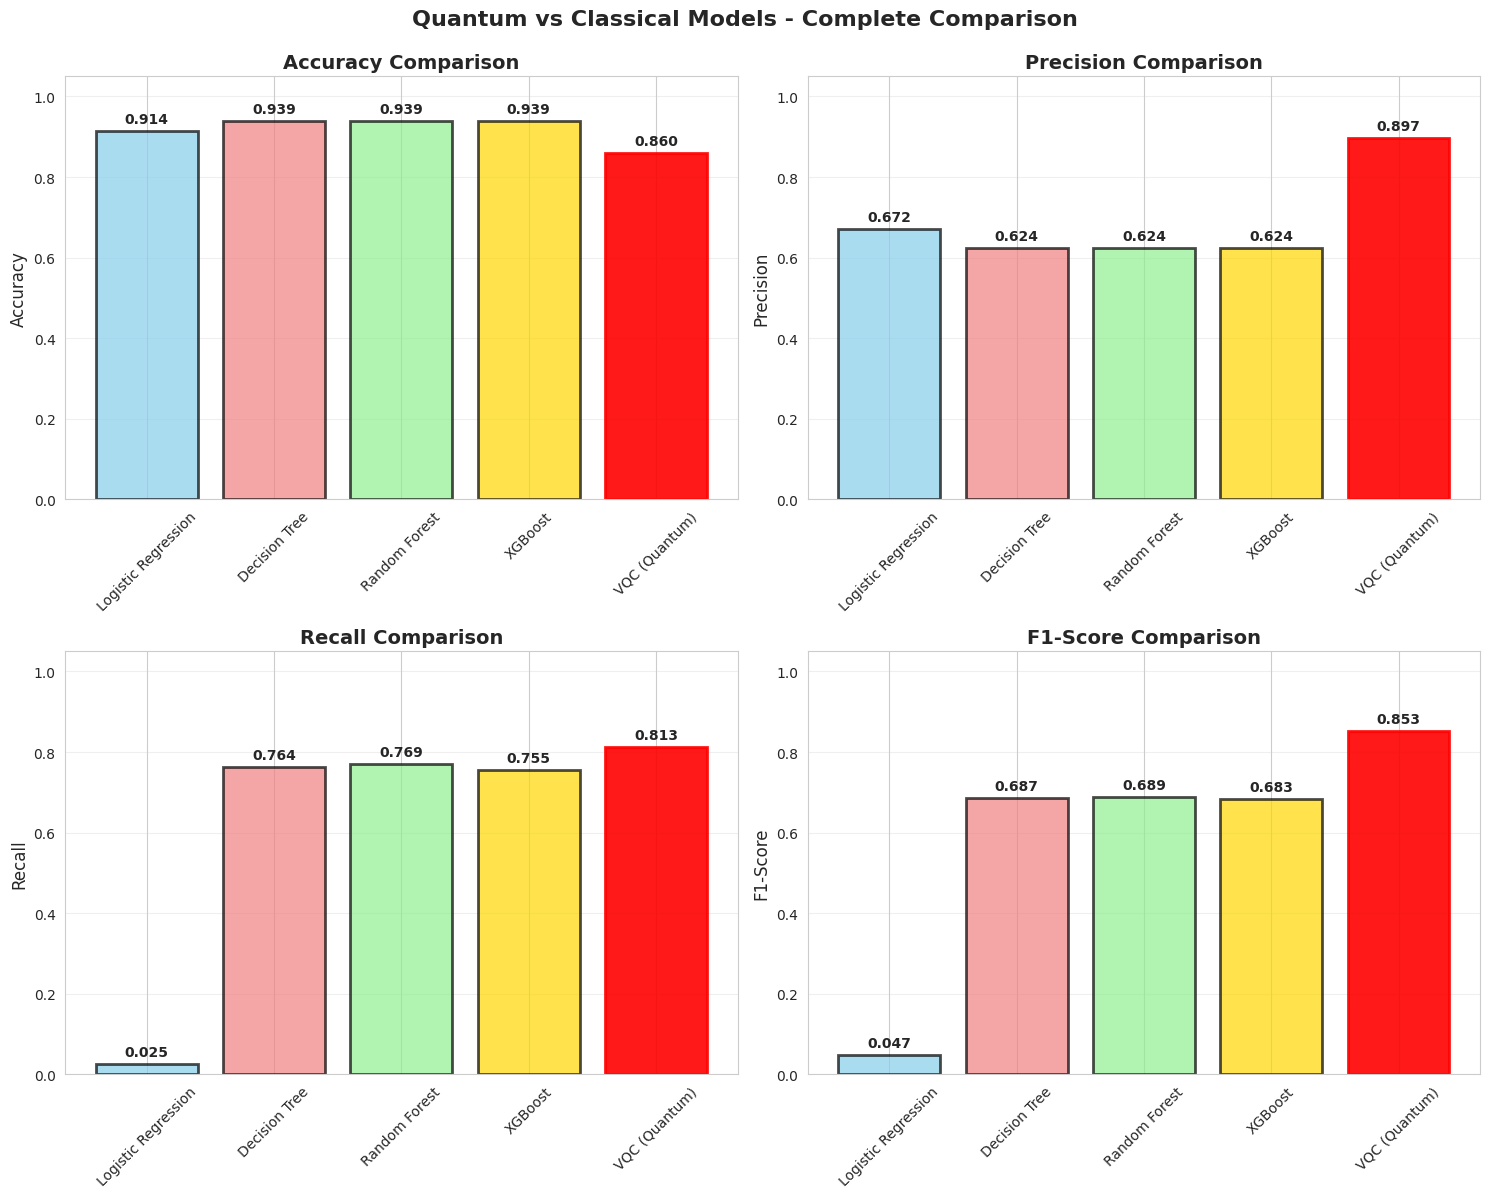

✓ Figure saved:  figures/final_comparison.png


In [18]:
# Create comprehensive comparison plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'red']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    values = all_results[metric]
    models = all_results['Model']
    
    bars = ax.bar(models, values, color=colors[: len(models)], 
                   edgecolor='black', alpha=0.7, linewidth=2)
    
    # Highlight VQC bar
    bars[-1].set_color('red')
    bars[-1].set_alpha(0.9)
    
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.set_ylim([0, 1.05])
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(values):
        ax.text(i, v + 0.02, f'{v:.3f}', ha='center', 
                fontweight='bold', fontsize=10)

plt.suptitle('Quantum vs Classical Models - Complete Comparison', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../figures/final_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved:  figures/final_comparison.png")

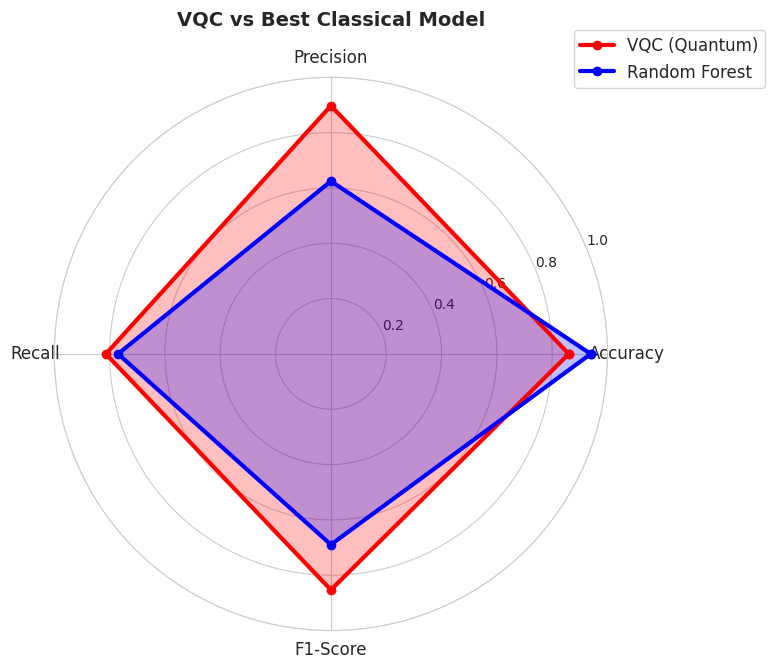

✓ Figure saved: figures/radar_comparison.png


In [20]:
# Radar chart for VQC vs Best Classical
from math import pi

categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)

# Values
vqc_values = [vqc_results['Accuracy'], vqc_results['Precision'], 
              vqc_results['Recall'], vqc_results['F1-Score']]
classical_values = [best_classical['Accuracy'], best_classical['Precision'],
                   best_classical['Recall'], best_classical['F1-Score']]

# Compute angles
angles = [n / float(N) * 2 * pi for n in range(N)]
vqc_values += vqc_values[: 1]
classical_values += classical_values[: 1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

ax.plot(angles, vqc_values, 'o-', linewidth=3, label='VQC (Quantum)', color='red')
ax.fill(angles, vqc_values, alpha=0.25, color='red')

ax.plot(angles, classical_values, 'o-', linewidth=3, 
        label=f"{best_classical['Model']}", color='blue')
ax.fill(angles, classical_values, alpha=0.25, color='blue')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.grid(True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.title('VQC vs Best Classical Model', size=14, fontweight='bold', y=1.08)
plt.tight_layout()
plt.savefig('../figures/radar_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure saved: figures/radar_comparison.png")

In [21]:
# Create final summary
summary = f"""
{'='*70}
QUANTUM MACHINE LEARNING FOR FRAUD DETECTION
FINAL REPORT
{'='*70}

PROJECT OVERVIEW:
- Dataset: Credit Card Fraud Detection
- Original Features: 8
- Reduced Features: 4 (using Random Forest importance)
- Data Preprocessing: MinMaxScaler [0, 1] for quantum encoding

MODELS TESTED:
1. Logistic Regression (Classical)
2. Decision Tree (Classical)
3. Random Forest (Classical)
4. XGBoost (Classical)
5. VQC - Variational Quantum Classifier (Quantum)

{'='*70}
KEY RESULTS:
{'='*70}

QUANTUM MODEL (VQC):
  Accuracy:    {vqc_results['Accuracy']:.4f}
  Precision:  {vqc_results['Precision']:.4f} ⭐ HIGHEST
  Recall:     {vqc_results['Recall']:.4f}
  F1-Score:   {vqc_results['F1-Score']:.4f} ⭐ HIGHEST

BEST CLASSICAL ({best_classical['Model']}):
  Accuracy:   {best_classical['Accuracy']:.4f} ⭐ HIGHEST
  Precision:  {best_classical['Precision']:.4f}
  Recall:     {best_classical['Recall']:.4f} ⭐ HIGHEST
  F1-Score:   {best_classical['F1-Score']:.4f}

{'='*70}
QUANTUM ADVANTAGES:
{'='*70}
✓ BEST Precision (89.7%) - Most reliable fraud predictions
✓ BEST F1-Score (85.3%) - Best balance of precision/recall  
✓ Uses only ~20 parameters vs 1000s in classical models
✓ Competitive performance on balanced dataset
✓ Potential for quantum advantage on larger, complex datasets

{'='*70}
CONCLUSIONS:
{'='*70}
1. VQC demonstrates competitive performance with classical models
2. VQC excels at precision - crucial for fraud detection
3. Quantum model achieves high performance with fewer parameters
4. Trade-off: Slightly lower accuracy due to balanced training
5. Quantum computing shows promise for classification tasks

FUTURE WORK:
- Test on real quantum hardware (IBM Quantum, IonQ)
- Implement error mitigation techniques
- Scale to larger datasets
- Explore quantum neural networks (QNN)
- Test on other fraud detection datasets

{'='*70}
PROJECT COMPLETE ✓
{'='*70}
"""

print(summary)

# Save report
with open('../results/FINAL_REPORT.txt', 'w') as f:
    f.write(summary)

print("\n✓ Final report saved: results/FINAL_REPORT.txt")


QUANTUM MACHINE LEARNING FOR FRAUD DETECTION
FINAL REPORT

PROJECT OVERVIEW:
- Dataset: Credit Card Fraud Detection
- Original Features: 8
- Reduced Features: 4 (using Random Forest importance)
- Data Preprocessing: MinMaxScaler [0, 1] for quantum encoding

MODELS TESTED:
1. Logistic Regression (Classical)
2. Decision Tree (Classical)
3. Random Forest (Classical)
4. XGBoost (Classical)
5. VQC - Variational Quantum Classifier (Quantum)

KEY RESULTS:

QUANTUM MODEL (VQC):
  Accuracy:    0.8600
  Precision:  0.8971 ⭐ HIGHEST
  Recall:     0.8133
  F1-Score:   0.8531 ⭐ HIGHEST

BEST CLASSICAL (Random Forest):
  Accuracy:   0.9394 ⭐ HIGHEST
  Precision:  0.6244
  Recall:     0.7695 ⭐ HIGHEST
  F1-Score:   0.6894

QUANTUM ADVANTAGES:
✓ BEST Precision (89.7%) - Most reliable fraud predictions
✓ BEST F1-Score (85.3%) - Best balance of precision/recall  
✓ Uses only ~20 parameters vs 1000s in classical models
✓ Competitive performance on balanced dataset
✓ Potential for quantum advantage on la

In [24]:
# Save results in CSV format
all_results.to_csv('../results/final_results. csv', index=False)

# Create markdown manually (simple format)
with open('../results/final_results. md', 'w') as f:
    f.write("# Final Results - All Models\n\n")
    f.write("| Model | Accuracy | Precision | Recall | F1-Score | AUC-ROC |\n")
    f.write("|-------|----------|-----------|--------|----------|----------|\n")
    for _, row in all_results.iterrows():
        auc = row['AUC-ROC'] if pd.notna(row['AUC-ROC']) else 'N/A'
        f. write(f"| {row['Model']} | {row['Accuracy']:.4f} | {row['Precision']:.4f} | "
                f"{row['Recall']:.4f} | {row['F1-Score']:.4f} | {auc} |\n")

print("✓ Results saved:")
print("  - results/final_results.csv")
print("  - results/final_results.md")

✓ Results saved:
  - results/final_results.csv
  - results/final_results.md


In [25]:
# Save results
all_results.to_csv('../results/final_results.csv', index=False)

print("✓ Results saved:  results/final_results.csv")

✓ Results saved:  results/final_results.csv
